<a href="https://colab.research.google.com/github/mustafabozkaya/PythonDataScienceHandbooks/blob/main/image_handle/%C4%B0mage_Processing_with_PIL_and_rembg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **İmage Processing with PIL and rembg**

## Installation

In [ ]:
!pip install -q --upgrade pip

!pip install -q rembg

!pip install --upgrade Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!curl http://ai.stanford.edu/~jkrause/car196/cars_train.tgz

In [ ]:
!pwd

/content


In [ ]:
import pandas as pd 
import numpy as np
import PIL as pil
import rembg as re
import matplotlib.pyplot as plt


In [ ]:
df=pd.read_csv("./sample_data/mnist_train_small.csv")
df.head()

,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape


(19999, 785)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19999 entries, 0 to 19998
Columns: 785 entries, 6 to 0.590
dtypes: int64(785)
memory usage: 119.8 MB


In [ ]:
df.shape

(19999, 785)

In [ ]:
df.columns

Index(['6', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8',
       ...
       '0.581', '0.582', '0.583', '0.584', '0.585', '0.586', '0.587', '0.588',
       '0.589', '0.590'],
      dtype='object', length=785)

In [ ]:
df.nunique()

6        10
0         1
0.1       1
0.2       1
0.3       1
         ..
0.586     3
0.587     1
0.588     1
0.589     1
0.590     1
Length: 785, dtype: int64

In [ ]:
print(" which img do you want to display :")
which_img=int(input("enter img number (0- 19999) "))

 which img do you want to display :
enter img number (0- 19999) 19000


In [ ]:
img=df.iloc[which_img,1:]
label=df.iloc[which_img,0]

In [ ]:
img.shape # img is series

(784,)

In [ ]:
img=img.values.reshape((28,28))# we convert series to numpy array

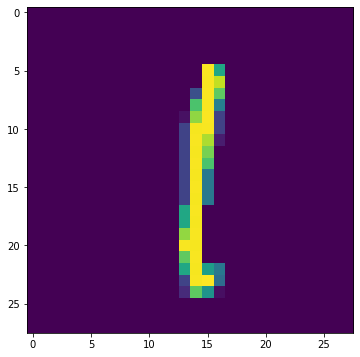

In [ ]:
plt.figure(figsize=(8,6))
plt.imshow(img)

In [ ]:
type(img)

numpy.ndarray

In [ ]:
PIL_image = pil.Image.fromarray(np.uint8(img)).convert('RGB')

In [ ]:
img_bg=re.remove(PIL_image)

AttributeError: ignored